<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 7 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [2]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [7]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    res= []
    for x in a:
        res.append(x*c)
    return res


def p1_comp(a: np.ndarray, c: float):
    return [x*c for x in a]


def p1_gen(a: np.ndarray, c: float):
    for x in a:
        yield x*c
    
def p1_np(a: np.ndarray, c: float):
    return (a*c).tolist()


In [8]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

time_p1()  # descomenta para probar


(0.1066431429971999,
 0.08304629900158034,
 0.09659587100031786,
 0.024537907000194537)

## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [9]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    extra= k//2
    b= []
    for i in range(extra, len(a)-extra ):
        tot=0
        for j in range(i-extra, i+extra+1):
            tot+= a[j]
        b.append(tot)
    return b


def p2_comp(a: np.ndarray, k: int = 3):
    extra= k//2
    return [sum(a[i-extra: i+extra+1]) for i in range(extra, len(a)-extra)]


def p2_gen(a: np.ndarray, k: int = 3):
    extra= k//2
    for i in range (extra, len(a) - extra):
        yield sum(a[i - extra : i + extra + 1])


def p2_np(a: np.ndarray, k: int = 3):
    kernel = np.ones(k)
    return np.convolve(a, kernel, mode="valid").tolist()


In [10]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

time_p2()  # descomenta para probar


(0.27474137600074755,
 0.3529082370005199,
 0.36284331600109,
 0.012240863001352409)

## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [11]:
# P3 — Stubs (completa las funciones)

def p3_for(a: np.ndarray, umbral: float):
    res =[]
    for x in a:
        y= np.sin(x) + x**2
        if y > umbral:
            res.append(y)
    return res


def p3_comp(a: np.ndarray, umbral: float):
    return [np.sin(x) + x**2 for x in a if (np.sin(x) + x**2 > umbral)]


def p3_gen(a: np.ndarray, umbral: float):
    for x in a:
        y = np.sin(x) + x**2
        if y > umbral:
            yield y


def p3_np(a: np.ndarray, umbral: float):
    y = np.sin(a) + a**2       
    mask = y > umbral          
    return y[mask].tolist()


In [12]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )

time_p3()  # descomenta para probar


(0.6370512350003992,
 1.166783578999457,
 0.6253814369993052,
 0.05069493300106842)

## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



## GUARDAR RESULTADOS DE TIEMPOS EN JSON - SOLUCIÓN

In [36]:
import timeit
import json
import platform
import sys
from datetime import datetime
from typing import Callable, Tuple, Any
import os # Para manejar directorios

In [37]:
# --- Configuración Global de N ---
# Queremos medir N en el rango [10^4, 10^5, 10^6] para ver cómo escalan.
N_SIZES = [10_000, 100_000, 1_000_000]

# Parámetros fijos de las mediciones
NUMBER = 3 # Número de llamadas dentro de timeit.timeit
REPEAT = 5 # Número de veces que timeit.repeat repite la medición

In [38]:
def run_timing_for_all_n(problem_name, time_func, N_sizes, number, repeat, **fixed_params):
    """
    Ejecuta una función de tiempo (ej. time_p1, time_p2) para todos los N_sizes.
    Devuelve un diccionario anidado de resultados.
    """
    all_results = {}
    
    # 1. Iterar sobre los tamaños N
    for n in N_sizes:
        print(f"-> Midiendo {problem_name} con N={n:,}...")
        
        # 2. Llamar a la función de tiempo específica (p1, p2 o p3)
        # Se asume que time_func devuelve (resultados_por_estrategia, n, number, repeat, [otros params])
        
        # Pasamos los parámetros fijos (como 'k' o 'umbral') y el N actual
        results_n, n_out, num_out, rep_out, *other_params = time_func(n=n, number=number, repeat=repeat, **fixed_params)
        
        # 3. Almacenar los resultados usando N como clave (para anidamiento)
        all_results[str(n)] = results_n 
    
    return all_results

In [40]:
# --- Nuevas funciones de ejecución (Reemplaza las anteriores) ---

def run_p1_timing(n, number, repeat, c=2.0):
    a = np.arange(n, dtype=float)
    variants = [
        ("for", lambda: p1_for(a, c)),
        ("comp", lambda: p1_comp(a, c)),
        ("gen", lambda: list(p1_gen(a, c))),
        ("numpy", lambda: p1_np(a, c)),
    ]
    results = {}
    for name, func in variants:
        s_per_call_median, raw_times = time_robust(func, number=number, repeat=repeat)
        results[name] = {
            "s_per_call_median": s_per_call_median,
            "repetitions": number * repeat,
            "raw_times_total": raw_times.tolist(),
        }
    return results, n, number, repeat, c # Tupla de retorno consistente


def run_p2_timing(n, number, repeat, k=3):
    a = np.arange(n, dtype=float)
    variants = [
        ("for", lambda: p2_for(a, k)),
        ("comp", lambda: p2_comp(a, k)),
        ("gen", lambda: list(p2_gen(a, k))),
        ("numpy", lambda: p2_np(a, k)),
    ]
    results = {}
    for name, func in variants:
        s_per_call_median, raw_times = time_robust(func, number=number, repeat=repeat)
        results[name] = {
            "s_per_call_median": s_per_call_median,
            "repetitions": number * repeat,
            "raw_times_total": raw_times.tolist(),
        }
    return results, n, number, repeat, k # Tupla de retorno consistente

def run_p3_timing(n, number, repeat, umbral=10.0):
    a = np.linspace(0, 1000, n, dtype=float)
    variants = [
        ("for", lambda: p3_for(a, umbral)),
        ("comp", lambda: p3_comp(a, umbral)),
        ("gen", lambda: list(p3_gen(a, umbral))),
        ("numpy", lambda: p3_np(a, umbral)),
    ]
    results = {}
    for name, func in variants:
        s_per_call_median, raw_times = time_robust(func, number=number, repeat=repeat)
        results[name] = {
            "s_per_call_median": s_per_call_median,
            "repetitions": number * repeat,
            "raw_times_total": raw_times.tolist(),
        }
    return results, n, number, repeat, umbral # Tupla de retorno consistente

# --- Ejecución para Múltiples N y Recolección ---

all_p1_results = run_timing_for_all_n("p1", run_p1_timing, N_SIZES, NUMBER, REPEAT)
all_p2_results = run_timing_for_all_n("p2", run_p2_timing, N_SIZES, NUMBER, REPEAT)
# NOTA: Para P3 usamos un N más grande porque sus cálculos son más lentos
all_p3_results = run_timing_for_all_n("p3", run_p3_timing, [10_000, 100_000, 200_000], NUMBER, REPEAT)


# 1. Metadatos (Actualizados)
metadata = {
    "timestamp": datetime.now().isoformat(timespec='seconds'),
    "python_version": sys.version.split()[0],
    "numpy_version": np.__version__,
    "machine": platform.machine(),
    "system": platform.system(),
    "params": { 
        "global_n_sizes": N_SIZES, # Nuevo parámetro global
        "global_number": NUMBER,
        "global_repeat": REPEAT,
        "p1": {"c": 2.0},
        "p2": {"k": 3},
        "p3": {"umbral": 10.0},
    }
}

# 2. Estructura de Resultados (Ahora anidada por N)
results = {
    "p1": all_p1_results, # Clave es 'N'
    "p2": all_p2_results, # Clave es 'N'
    "p3": all_p3_results, # Clave es 'N'
}

final_data = {
    "metadata": metadata,
    "results_by_n": results # Usamos el nombre sugerido "results_by_n"
}

# 3. Guardar el JSON (Reusa el código de guardado)
results_dir = "results/tiempos"
if not os.path.exists(results_dir):
    os.makedirs(results_dir) 

timestamp_str = datetime.now().strftime("%Y-%m-%d_%H%M%S")
# Nombre del archivo actualizado para indicar múltiples N
filename = f"tiempos_p123_multin_{timestamp_str}.json"
filepath = os.path.join(results_dir, filename)

try:
    with open(filepath, 'w') as f:
        json.dump(final_data, f, indent=4)
    print(f"\n✅ Resultados con MÚLTIPLES N guardados con éxito en: {filepath}")
except Exception as e:
    print(f"❌ Error al guardar el archivo JSON: {e}")

-> Midiendo p1 con N=10,000...
-> Midiendo p1 con N=100,000...
-> Midiendo p1 con N=1,000,000...
-> Midiendo p2 con N=10,000...
-> Midiendo p2 con N=100,000...
-> Midiendo p2 con N=1,000,000...
-> Midiendo p3 con N=10,000...
-> Midiendo p3 con N=100,000...
-> Midiendo p3 con N=200,000...

✅ Resultados con MÚLTIPLES N guardados con éxito en: results/tiempos/tiempos_p123_multin_2025-12-01_163644.json


## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.


## 1. Preparacion conceptual de los datos

In [41]:
import pandas as pd

def json_to_dataframe_multin(filepath):
    """Carga el JSON con múltiples N anidados y lo transforma a un DataFrame en formato largo."""
    
    try:
        with open(filepath, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"❌ Error: Archivo no encontrado en {filepath}.")
        return None
    
    records = []
    
    # Iterar sobre los resultados (ahora en 'results_by_n')
    for problema, resultados_por_n in data['results_by_n'].items():
        
        # Iterar sobre cada tamaño N medido
        for n_str, resultados_n in resultados_por_n.items():
            n = int(n_str) # Convertir la clave 'N' (string) a entero
            
            # Iterar sobre cada estrategia medida en ese N
            for estrategia, res_data in resultados_n.items():
                
                raw_times = res_data['raw_times_total']
                # Recalcular el número de llamadas por repetición
                number_of_calls = res_data['repetitions'] // len(raw_times)
                
                for i, total_time in enumerate(raw_times):
                    s_per_call = total_time / number_of_calls
                    
                    records.append({
                        'problema': problema,
                        'estrategia': estrategia,
                        'n': n,
                        'tiempo_s': s_per_call,
                        'repeticion_id': i,
                        'tiempo_s_median': res_data['s_per_call_median']
                    })
                
    df = pd.DataFrame(records)
    category_order = ['for', 'comp', 'gen', 'numpy']
    df['estrategia'] = pd.Categorical(df['estrategia'], categories=category_order, ordered=True)
    
    return df


filename_multin = "tiempos_p123_multin_2025-12-01_163644.json"
filepath_multin = os.path.join("results", "tiempos", filename_multin)

df_tiempos_multin = json_to_dataframe_multin(filepath_multin)

if df_tiempos_multin is not None:
    print("✅ DataFrame con Múltiples N Creado.")
    print(df_tiempos_multin.head())

✅ DataFrame con Múltiples N Creado.
  problema estrategia      n  tiempo_s  repeticion_id  tiempo_s_median
0       p1        for  10000  0.003814              0         0.003488
1       p1        for  10000  0.003104              1         0.003488
2       p1        for  10000  0.003374              2         0.003488
3       p1        for  10000  0.004005              3         0.003488
4       p1        for  10000  0.003488              4         0.003488


## 2. Grafico de barras agrupadas


Generando Gráfico de Barras para el Problema: p1


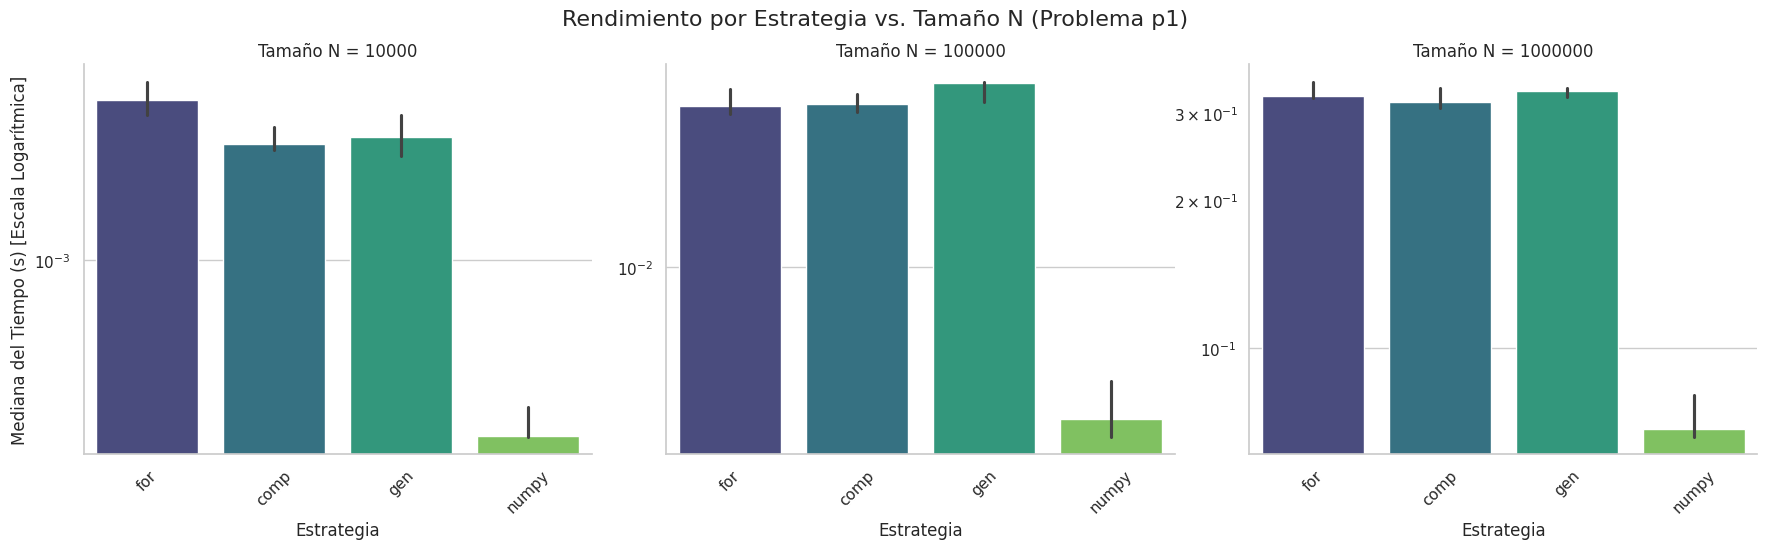


Generando Gráfico de Barras para el Problema: p2


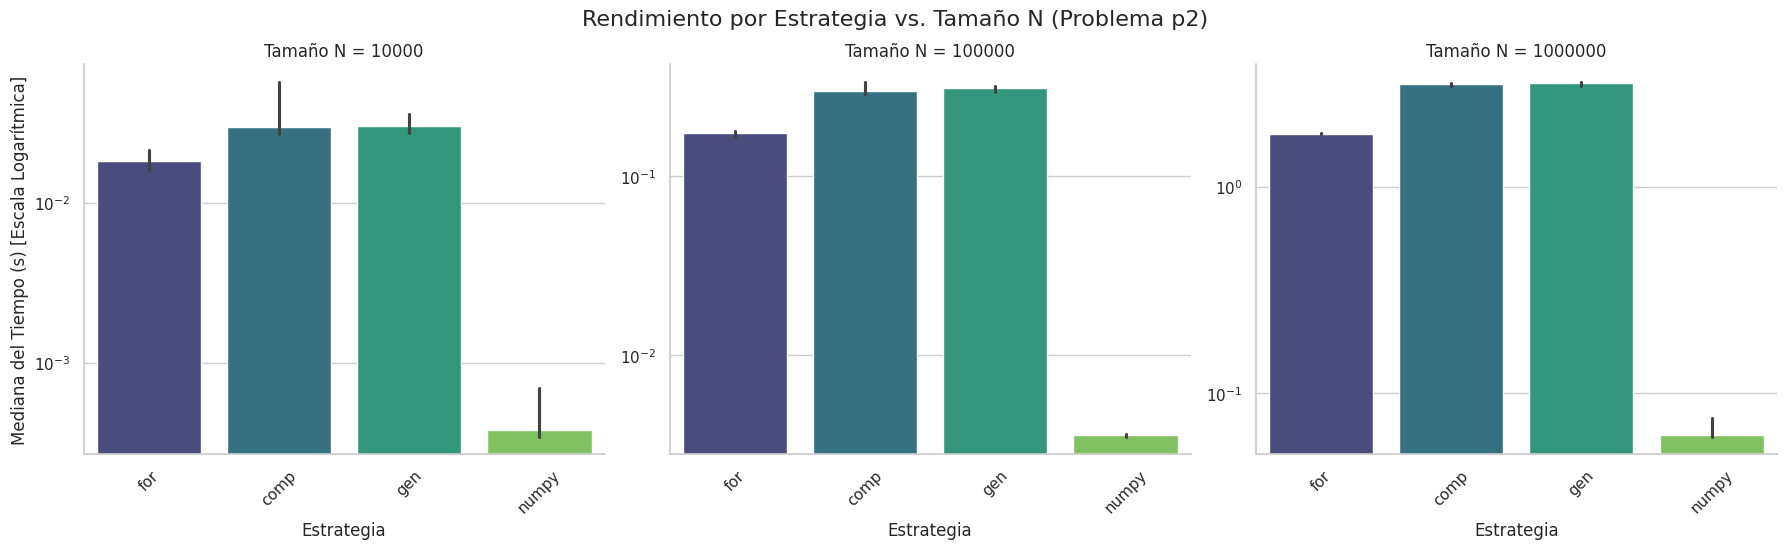


Generando Gráfico de Barras para el Problema: p3


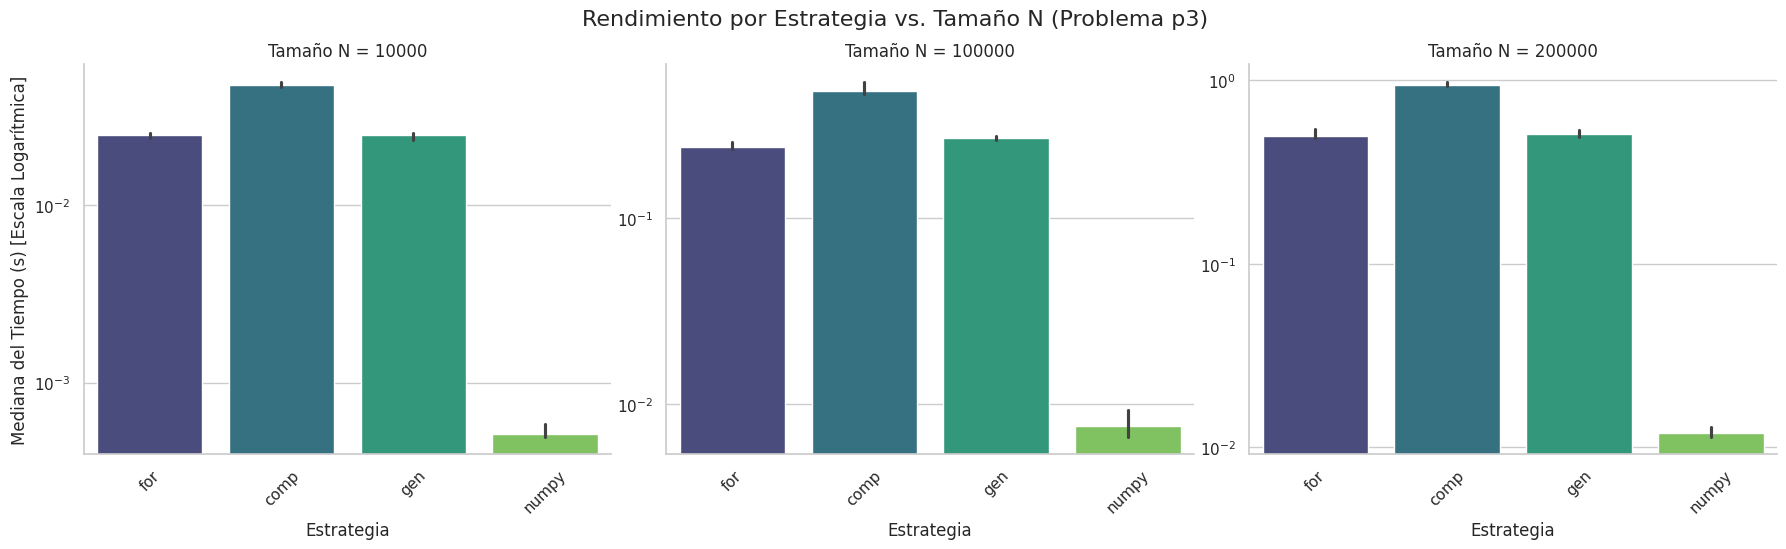

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_barras_agrupadas_por_n(df, problema):
    """
    Genera un gráfico de barras agrupadas por estrategia, con paneles (columnas) por N.
    Utiliza la mediana como altura de la barra y el Intervalo de Confianza (CI) como error.
    """

    print(f"\nGenerando Gráfico de Barras para el Problema: {problema}")
    
    # Filtrar los datos para el problema deseado
    df_filtered = df[df['problema'] == problema].copy()

    if df_filtered.empty:
        print(f"No hay datos para el problema '{problema}'.")
        return

    # Convertir N a string para mejor visualización en los títulos de los paneles
    df_filtered['N_size'] = 'N = ' + df_filtered['n'].astype(str)

    # Crear el gráfico de barras con seaborn.catplot
    g = sns.catplot(
        data=df_filtered,
        x='estrategia',
        y='tiempo_s',
        hue='estrategia', 
        kind='bar',
        col='N_size',  # Panelar por N
        col_order=sorted(df_filtered['N_size'].unique()),
        estimator=np.median, # Usar la mediana como altura de la barra
        errorbar=('ci', 95), # Intervalo de confianza del 95% para las barras de error
        height=5, 
        aspect=1.2,
        palette="viridis",
        sharey=False # Permitir que el eje Y cambie en cada panel (IMPORTANTE)
    )

    # Personalizar y mostrar
    g.fig.suptitle(f'Rendimiento por Estrategia vs. Tamaño N (Problema {problema})', y=1.03, fontsize=16)
    g.set_axis_labels("Estrategia", "Mediana del Tiempo (s) [Escala Logarítmica]")
    g.set_titles("Tamaño {col_name}")
    
    for ax in g.axes.flat:
        if not ax.get_ylim() == (0, 1):
            ax.set_yscale('log') # Usar escala logarítmica para mejorar la visualización
        ax.tick_params(axis='x', rotation=45)
        
    plt.show()

# --- Ejecución de las Barras (Ejemplo) ---
# Asumiendo que 'df_tiempos_multin' está cargado.
if 'df_tiempos_multin' in locals() or 'df_tiempos_multin' in globals():
    problemas = df_tiempos_multin['problema'].unique()
    for p in problemas:
        plot_barras_agrupadas_por_n(df_tiempos_multin, p)
else:
    print("\n[ADVERTENCIA]: El DataFrame 'df_tiempos_multin' no está definido para ejecutar el ejemplo.")

Interpretación de la grafica:

- Las estrategias for, comp y gen tienen tiempos muy similares, pero NumPy es claramente la más rápida, reduciendo el tiempo por llamada en uno o dos órdenes de magnitud.
- En esta escala logarítmica se aprecia que las estrategias puras de Python dependen más del costo por iteración, mientras que NumPy se beneficia de operaciones vectorizadas y mejor uso de memoria/caché.
- Para cualquier carga de trabajo parecida, la recomendación práctica es preferir NumPy para rendimiento y consistencia, usando las demás estrategias solo si se necesita control detallado del flujo o se trabaja sin dependencias externas.
- Las otras 3 alternativas (for, comp y gen) no muestran diferencias muy grandes en el problema 1 y 2, mientras que para el 3, que es mucho mas costoso, las diferencias son mas notorias pero aun asi pequeñas en comparacion a la diferencia que presenta numpy

## 3. Bloxpots o Violinplots


Generando Boxplot/Swarmplot para el Problema: p1, N=100,000


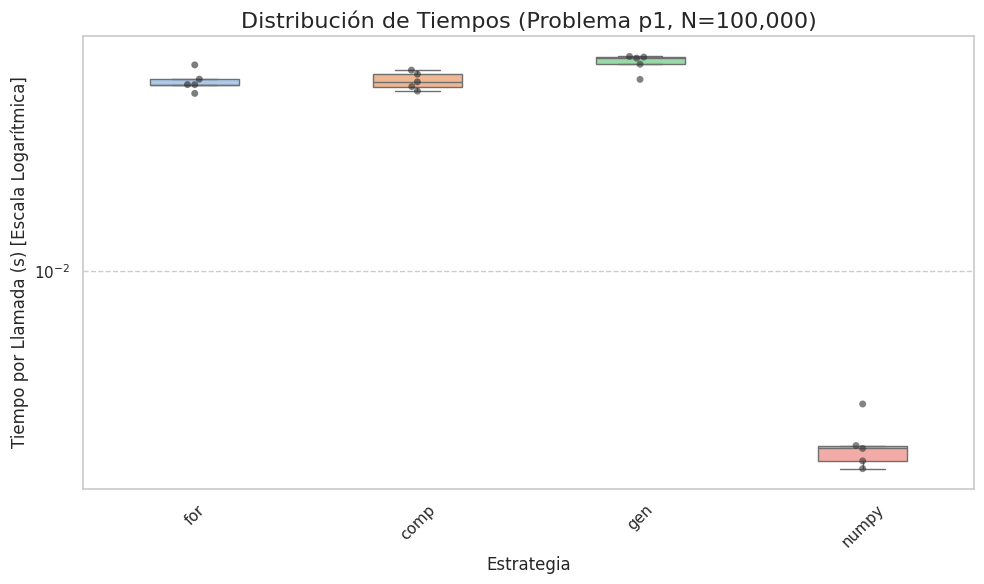


Generando Boxplot/Swarmplot para el Problema: p2, N=100,000


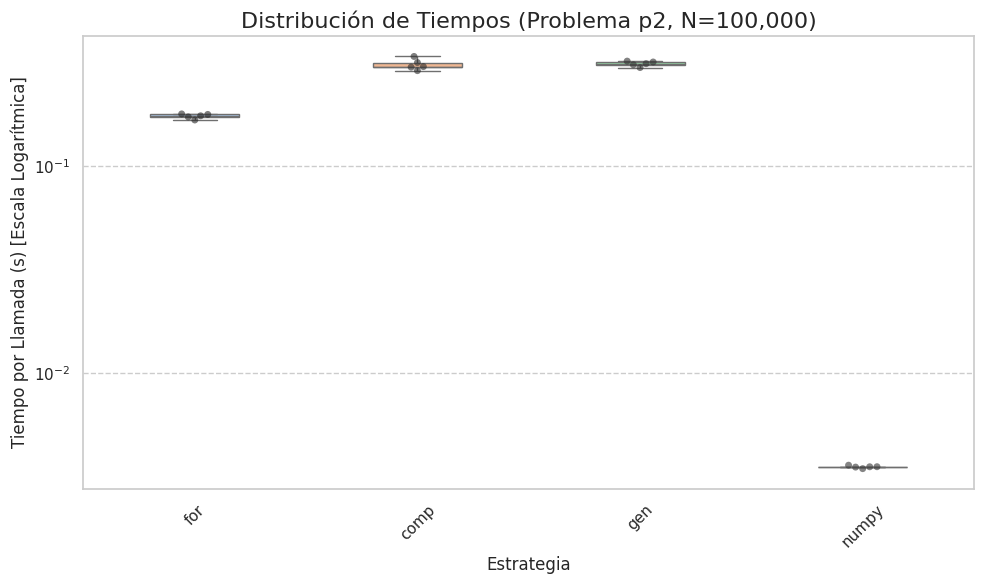


Generando Boxplot/Swarmplot para el Problema: p3, N=100,000


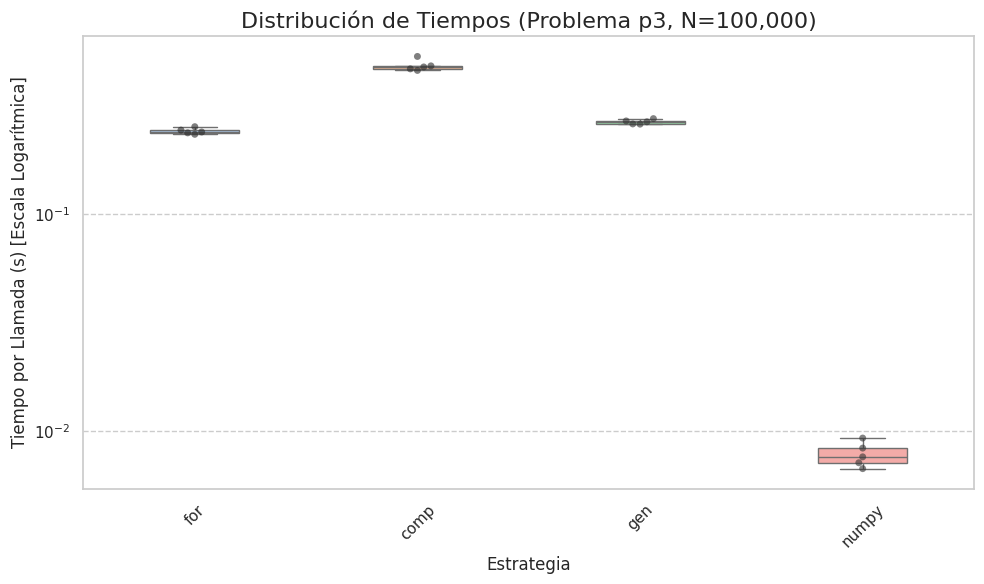

In [49]:
def plot_box_violin_y_swarm(df, problema, n_value):
    """
    Genera un Boxplot y un Swarmplot para ver la distribución completa 
    del tiempo para un N y Problema fijos.
    """
    
    print(f"\nGenerando Boxplot/Swarmplot para el Problema: {problema}, N={n_value:,}")

    # Filtrar los datos para el problema y N deseados
    df_filtered = df[(df['problema'] == problema) & (df['n'] == n_value)].copy()

    if df_filtered.empty:
        print(f"No hay datos para el problema '{problema}' con N={n_value}.")
        return

    plt.figure(figsize=(10, 6))

    # 1. Boxplot (Muestra mediana, cuartiles y outliers)
    # showfliers=False se usa para que los outliers sean marcados solo por el swarmplot
    sns.boxplot(
        data=df_filtered,
        x='estrategia',
        y='tiempo_s',
        palette="pastel",
        showfliers=False, 
        width=0.4,
        hue='estrategia',
        legend=False
    )
    
    # 2. Swarmplot (Superpone todos los puntos de las repeticiones)
    sns.swarmplot(
        data=df_filtered,
        x='estrategia',
        y='tiempo_s',
        size=5,
        alpha=0.6, # Transparencia para ver la densidad
        legend=False,
        hue='estrategia',
        palette='dark:0.2'
    )
    
    # Personalizar y mostrar
    plt.title(f'Distribución de Tiempos (Problema {problema}, N={n_value:,})', fontsize=16)
    plt.xlabel("Estrategia")
    plt.ylabel("Tiempo por Llamada (s) [Escala Logarítmica]")
    plt.yscale('log') # Usar escala logarítmica
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

# --- Ejecución de Boxplots/Swarmplots (Ejemplo) ---
# Asumiendo que 'df_tiempos_multin' está cargado.
if 'df_tiempos_multin' in locals() or 'df_tiempos_multin' in globals():
    problemas = df_tiempos_multin['problema'].unique()
    n_sizes = sorted(df_tiempos_multin['n'].unique())
    n_max = n_sizes[-1] # Elegimos el N más grande para el análisis detallado

    for p in problemas:
        plot_box_violin_y_swarm(df_tiempos_multin, p, 100000)
else:
    print("\n[ADVERTENCIA]: El DataFrame 'df_tiempos_multin' no está definido para ejecutar el ejemplo.")

Intepretación de la grafica:

- NumPy es la estrategia más rápida, y su ventaja aumenta conforme crece n.
- NumPy también muestra la menor dispersión, con curvas muy estables y sin outliers visibles.
- Las versiones for, comp y gen escalan linealmente, mientras que NumPy escala mejor gracias a su vectorización y uso eficiente de memoria/caché.
- No hay saltos anómalos en los tiempos; solo el aumento esperado por la complejidad O(n·k) en las versiones manuales

## 4. Curvas de escalamiento


Generando Curvas de Escalamiento (Tiempo vs. N)


/tmp/ipykernel_30866/210882788.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_median = df.groupby(['problema', 'n', 'estrategia'])['tiempo_s'].median().reset_index()


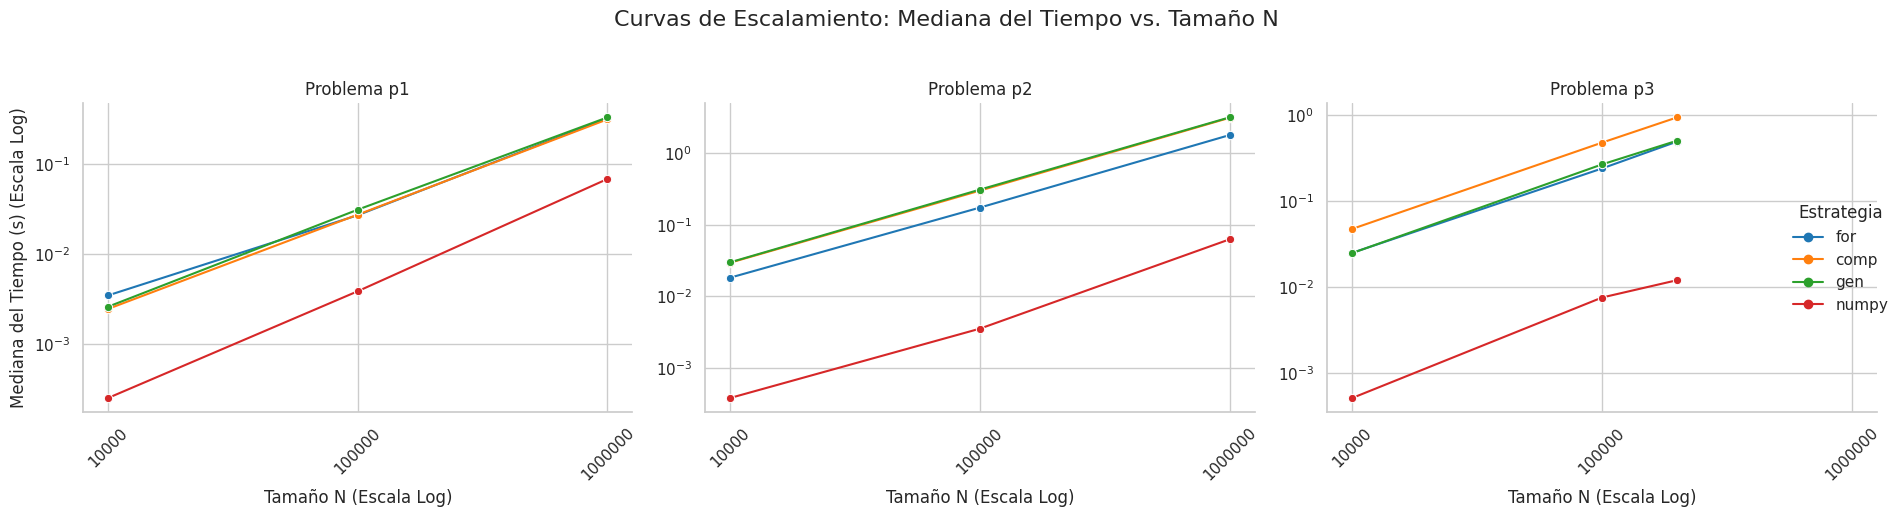

In [54]:
def plot_curvas_de_escalamiento(df):
    """
    Genera un gráfico de líneas (curvas de escalamiento) con paneles por Problema.
    Eje X: N (tamaño de entrada)
    Eje Y: Mediana del tiempo por llamada (s_por_llamada)
    Usa escala log-log para visualizar mejor la escalabilidad.
    """
    
    print("\nGenerando Curvas de Escalamiento (Tiempo vs. N)")
    
    # Aseguramos que 'n' sea numérico para el eje X
    df['n'] = df['n'].astype(float)
    
    # Calcular la mediana del tiempo por cada combinación de Problema, N y Estrategia
    df_median = df.groupby(['problema', 'n', 'estrategia'])['tiempo_s'].median().reset_index()

    # Usamos seaborn.relplot para gráficos de línea con facetas (columnas por problema)
    g = sns.relplot(
        data=df_median,
        x='n',
        y='tiempo_s',
        hue='estrategia',   # Una línea por estrategia
        col='problema',     # Un panel por problema
        kind='line',        # Gráfico de líneas
        marker='o',         # Marcar cada punto medido de N
        height=5, 
        aspect=1.2,
        palette="tab10",
        facet_kws=dict(sharey=False) # Ejes Y independientes para cada problema (si las magnitudes son muy distintas)
    )

    # Personalizar y aplicar escala logarítmica
    g.fig.suptitle('Curvas de Escalamiento: Mediana del Tiempo vs. Tamaño N', y=1.03, fontsize=16)
    g.set(xscale="log", yscale="log") # Escala Log-Log
    g.set_axis_labels("Tamaño N (Escala Log)", "Mediana del Tiempo (s) (Escala Log)")
    g.set_titles("Problema {col_name}")
    g.legend.set_title("Estrategia")
    
    # Mejorar el formato del eje X para mostrar N sin notación científica
    for ax in g.axes.flat:
        from matplotlib.ticker import ScalarFormatter
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(axis='x', rotation=45)
        
    plt.tight_layout()
    plt.show()

# --- Ejecución de las Curvas de Escalamiento ---
if 'df_tiempos_multin' in locals() or 'df_tiempos_multin' in globals():
    plot_curvas_de_escalamiento(df_tiempos_multin.copy())
else:
    print("\n[ADVERTENCIA]: El DataFrame 'df_tiempos_multin' no está definido.")

Interpretacion de las graficas:
- Para el problema 1 hay un cruce entre usar un gen y comp para n=100000, donde se vuelve mas rapido gen. Sin embargo al final, para n=1,000,000 las tres alternativas a numpy son relativamente igual de rapisas sin importar el tamaño. Y para n=10,000 si se observa mayor rapidez para comp y gen en comparacion con un for.
- Para el problema 2 vemos que la escalabilidad de comp y gen se mantiene practicamente igual, mientras que un for es mas rapido que las dos anteriores sin importar el tamaño y numpy nuevamente es mucho mas rapido
- En el problema 2 hay un cambo ligero en la pendiente de numpy al pasar el n=100,000, donde se un poco mas lento conforme avanza n
- En el problema 3 vemos que comp es mas lento comparado con todo el resto, mientras que for y gen son relativamente iguales habiendo solo una pequeña diferencia en n=100,000 donde gen se vuelve minimamente mas rapido que for. Nuevamente numpy es mas rapido que todos, habiendo un cambio en la pendiente donde a partir de n=100,000 se vuelve mas rapido

## 5. Heatmap de Razones


Generando Heatmap de Razones (vs. NumPy)


/tmp/ipykernel_30866/2301889347.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pivot = df.groupby(['problema', 'n', 'estrategia'])['tiempo_s'].median().reset_index()
/tmp/ipykernel_30866/2301889347.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_pivot.pivot_table(


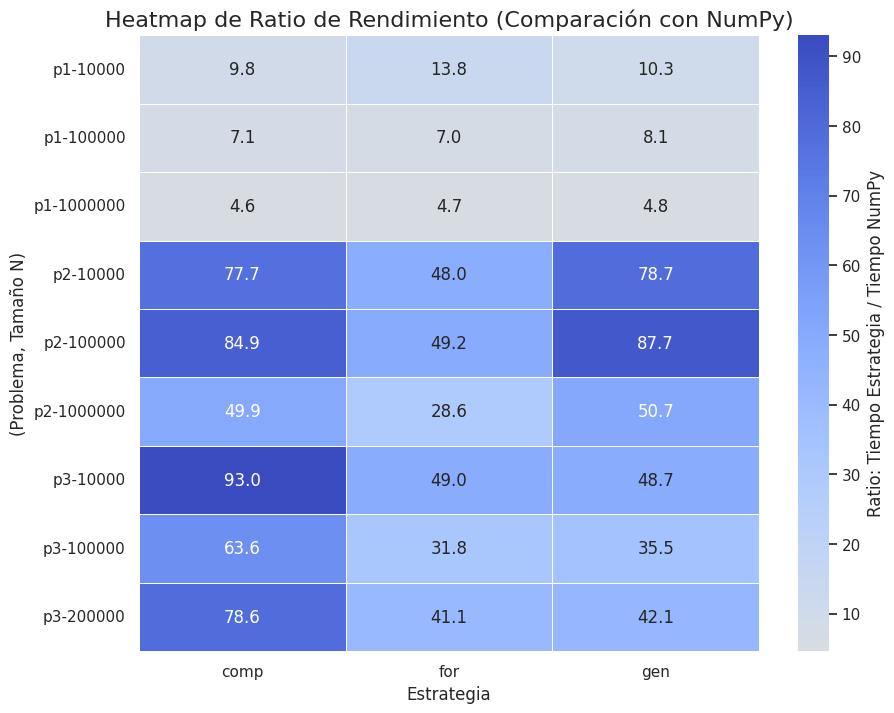

In [55]:
def plot_heatmap_razones(df):
    """
    Calcula la razón Tiempo_Estrategia / Tiempo_NumPy y la visualiza en un Heatmap.
    """
    
    print("\nGenerando Heatmap de Razones (vs. NumPy)")
    
    # 1. Calcular la MEDIANA del tiempo_s para cada grupo (Problema, N, Estrategia)
    df_pivot = df.groupby(['problema', 'n', 'estrategia'])['tiempo_s'].median().reset_index()

    # 2. Pivotar para tener las estrategias como columnas
    df_pivot = df_pivot.pivot_table(
        index=['problema', 'n'], 
        columns='estrategia', 
        values='tiempo_s'
    ).reset_index()

    # 3. Calcular la Razón de Rendimiento vs. NumPy
    # La columna 'numpy' es el denominador (referencia)
    
    # Creamos un nuevo DataFrame para las razones
    df_razones = df_pivot[['problema', 'n']].copy()
    
    # Iterar sobre las estrategias que NO son 'numpy'
    for estrategia in [col for col in df_pivot.columns if col not in ['problema', 'n', 'numpy']]:
        # Razón = Tiempo_Estrategia / Tiempo_NumPy
        df_razones[f'Razon_{estrategia}'] = df_pivot[estrategia] / df_pivot['numpy']

    # 4. Preparar el DataFrame final para el Heatmap
    # Reestructurar (derretir) el DataFrame para que 'estrategia' vuelva a ser una columna
    df_heatmap = df_razones.melt(
        id_vars=['problema', 'n'], 
        value_vars=[col for col in df_razones.columns if col.startswith('Razon_')],
        var_name='Razon_Estrategia',
        value_name='Ratio'
    )
    
    # Extraer el nombre simple de la estrategia
    df_heatmap['Estrategia'] = df_heatmap['Razon_Estrategia'].str.replace('Razon_', '')
    df_heatmap = df_heatmap.drop(columns='Razon_Estrategia')
    
    # Pivotar para el formato final del Heatmap: Filas=Problema/N, Columnas=Estrategia
    df_heatmap_final = df_heatmap.pivot_table(
        index=['problema', 'n'],
        columns='Estrategia',
        values='Ratio'
    )
    
    # 5. Generar el Heatmap
    plt.figure(figsize=(10, 8))
    
    # La escala de color (cmap) debe resaltar valores altos
    sns.heatmap(
        df_heatmap_final,
        annot=True,              # Mostrar el valor numérico en la celda
        fmt=".1f",               # Formato de un decimal
        cmap="coolwarm_r",       # coolwarm_r: Escala de colores que pone el rojo (malo) en valores altos
        center=1.0,              # Centrar el mapa de calor en 1.0 (el punto donde es igual a NumPy)
        linewidths=.5,
        cbar_kws={'label': 'Ratio: Tiempo Estrategia / Tiempo NumPy'}
    )

    plt.title('Heatmap de Ratio de Rendimiento (Comparación con NumPy)', fontsize=16)
    plt.ylabel("(Problema, Tamaño N)")
    plt.xlabel("Estrategia")
    plt.yticks(rotation=0)
    plt.show()

# --- Ejecución del Heatmap ---
if 'df_tiempos_multin' in locals() or 'df_tiempos_multin' in globals():
    plot_heatmap_razones(df_tiempos_multin.copy())
else:
    print("\n[ADVERTENCIA]: El DataFrame 'df_tiempos_multin' no está definido.")